In [1]:
#Referencia : Codigo brindado en clase
#Integrantes : Bryann Alfaro, Raul Jimenez, Donaldo Garcia

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from art.estimators.classification import KerasClassifier #No soporta TF 2
from art.utils import load_dataset


tf.compat.v1.disable_eager_execution()

c:\users\bryann\appdata\local\programs\python\python38\lib\site-packages\art\estimators\certification\__init__.py:14: UserWarning: PyTorch not found. Not importing DeepZ or Interval Bound Propagation functionality
  warnings.warn("PyTorch not found. Not importing DeepZ or Interval Bound Propagation functionality")


In [3]:
#Load the model 
model1 = tf.keras.models.load_model('modelo_lab')

Getting the data again to evasion

In [4]:
import os
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
# crea un dataframe a partir de las carpetas dentro de "malimg_dataset" y sus archivos .bytes
df = pd.DataFrame(columns=['Family', 'Image'])
fam_cat = {}
for i, family in enumerate(os.listdir('malimg_dataset')):
    fam_cat[i] = family
    for image in os.listdir(f'malimg_dataset/{family}'):
        imagen = Image.open(f'malimg_dataset/{family}/{image}')
        imagen = imagen.resize((64,64))
        # new_row = {'Family': family, 'Name': image, 'Family_cat': i ,'Image': np.array(imagen).tolist()}
        # df = pd.concat([df, pd.DataFrame(new_row, index=[0])], ignore_index=True)
        new_data = {'Family': [family], 'Name': [image], 'Family_cat': [i], 'Image': [np.array(imagen).tolist()]}
        new_df = pd.DataFrame(new_data)
        df = pd.concat([df, new_df], ignore_index=True)
# for family in os.listdir('malimg_dataset'):
#     for image in os.listdir(f'malimg_dataset/{family}'):
#         imagen = Image.open(f'malimg_dataset/{family}/{image}')
#         imagen = imagen.resize((50,50))
#         #make the array of the image with 50x50 without numpy
#         #df = df.append({'Family': family, 'Name': image, 'Image': imagen}, ignore_index=True)
#         df = df.append({'Family': family, 'Name': image, 'Image': np.array(imagen).tolist()}, ignore_index=True)
#         #make the array of the image with 50x50
        

# muestra las primeras 5 filas del dataframe
df.head()

,Family,Image,Name,Family_cat
0,Adialer.C,"[[2, 3, 0, 7, 1, 1, 0, 2, 12, 13, 15, 9, 12, 1...",000bde2e9a94ba41c0c111ffd80647c2.png,0.0
1,Adialer.C,"[[2, 14, 2, 0, 0, 0, 4, 4, 11, 6, 12, 20, 9, 1...",000e30a0819ac7ed931d629ce2ef8948.png,0.0
2,Adialer.C,"[[2, 14, 2, 0, 0, 0, 5, 6, 11, 6, 12, 20, 9, 1...",002f06eff1d222560939be72583d6ae9.png,0.0
3,Adialer.C,"[[2, 3, 0, 6, 1, 0, 0, 2, 13, 13, 15, 9, 12, 1...",0044f0746b812f6b454ce210bc58c572.png,0.0
4,Adialer.C,"[[2, 3, 0, 6, 1, 0, 0, 2, 12, 13, 15, 9, 12, 1...",0046a83d932a3d431eb21a99b46d6af7.png,0.0


In [6]:
# removemos las familias con menos de 150 muestras del dataset
df = df[df['Family'].isin(df['Family'].value_counts()[df['Family'].value_counts() > 150].index)]
df.value_counts('Family')

Family
Allaple.A         2949
Allaple.L         1591
Yuner.A            800
Instantaccess      431
VB.AT              408
Fakerean           381
Lolyda.AA1         213
C2LOP.gen!g        200
Alueron.gen!J      198
Lolyda.AA2         184
Dialplatform.B     177
Dontovo.A          162
Lolyda.AT          159
Rbot!gen           158
dtype: int64

In [7]:
#Dividir el dataset
from sklearn.model_selection import train_test_split
X = df['Image'].values
y = df['Family_cat'].values
#convert X to numpy array and inside with simple list
X = np.array([np.array(xi) for xi in X])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Normalizar los datos
X_train

array([[[ 78,  36,  42, ...,  44,  52,  42],
        [ 98, 131, 112, ..., 149, 124, 125],
        [123, 136, 136, ..., 143, 122, 117],
        ...,
        [109, 122, 121, ..., 120, 116, 103],
        [123, 127, 131, ..., 129, 153, 142],
        [114, 101, 103, ...,  89,  96,  81]],

       [[ 55,  32,  44, ...,  38,  44,  34],
        [100, 125, 137, ...,  99, 105, 125],
        [129, 147, 137, ..., 123, 113, 116],
        ...,
        [138, 114, 142, ..., 118, 120, 118],
        [143, 109, 122, ..., 125, 133, 127],
        [115, 136, 141, ..., 109, 139, 127]],

       [[ 98,  88,  69, ...,  80,  82,  97],
        [136, 117, 118, ..., 136, 128, 133],
        [120, 103,  99, ..., 101,  90, 105],
        ...,
        [ 91, 101,  77, ...,  96,  78,  64],
        [ 45,  38,  35, ...,  49,  24,  20],
        [ 29,  46,  54, ...,  40,  39,  41]],

       ...,

       [[ 57,  40,  39, ...,  55,  64,  40],
        [125, 123, 117, ..., 111, 134, 146],
        [120, 128, 107, ..., 119, 119, 142

In [8]:
#Normalizar los datos
X_train = X_train/255
X_test = X_test/255

0.7098039215686275

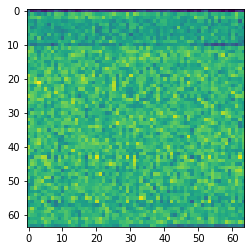

In [9]:
#Mostrar una imagen
plt.imshow(X_train[0])
#mostrar la normalizacion
X_train[0].max()

In [10]:
classifier = KerasClassifier(
    model=model1,
clip_values= (0.0,1.0))

In [11]:
from art.attacks.evasion import SquareAttack

In [12]:
attack_auto =SquareAttack(
    estimator=classifier, 
    eps=0.15
    )

In [13]:
X_train = X_train.reshape(6408, 64, 64, 1)
X_test = X_test.reshape(1603, 64, 64, 1)

In [14]:
test_images_adv = attack_auto.generate(x=X_test)

c:\users\bryann\appdata\local\programs\python\python38\lib\site-packages\keras\engine\training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


SquareAttack - restarts:   0%|          | 0/1 [00:00<?, ?it/s]

SquareAttack - iterations:   0%|          | 0/100 [00:00<?, ?it/s]

In [15]:
from tensorflow.keras.utils import to_categorical

In [16]:
categorical_y_entrenamiento = to_categorical(y_train, 25)
categorical_y_test = to_categorical(y_test, 25)

In [17]:
#Evaluar los modelos
score_clean = model1.evaluate(
    x=X_test, 
    y=categorical_y_test
    )

# Con adversarial
score_adv = model1.evaluate(
    x=test_images_adv, 
    y=categorical_y_test
    )

# Comparing test losses
print(f"Clean test set loss: {score_clean[0]:.2f} " 
      f"vs adversarial set test loss: {score_adv[0]:.2f}")

# Comparing test accuracies
print(f"Clean test set accuracy: {score_clean[1]:.5f} " 
      f"vs adversarial test set accuracy: {score_adv[1]:.5f}")

c:\users\bryann\appdata\local\programs\python\python38\lib\site-packages\keras\engine\training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Clean test set loss: 0.01 vs adversarial set test loss: 0.64
Clean test set accuracy: 0.99813 vs adversarial test set accuracy: 0.51591
